In [1]:
import numpy as np
import pandas as pd
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
DATA_DIR = "../../data/"

In [3]:
jain_results = pd.read_excel(path.join(DATA_DIR, "Jain/jain_results.xlsx"))
jain_results.drop(0, axis=0, inplace=True)
jain_results.head()

,Name,HEK Titer (mg/L),Fab Tm by DSF (°C),SGAC-SINS AS100 ((NH4)2SO4 mM),HIC Retention Time (Min)a,SMAC Retention Time (Min)a,Slope for Accelerated Stability,Poly-Specificity Reagent (PSR) SMP Score (0-1),Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average,CIC Retention Time (Min),CSI-BLI Delta Response (nm),ELISA,BVP ELISA
1,abituzumab,89.555458,75.5,900.0,9.227,8.725,0.05563,0.166666,1.458861,8.621,0.00,1.137375,2.720799
2,abrilumab,100.223196,71.0,900.0,9.413,8.699,0.02829,0.000000,-0.928526,8.384,-0.02,1.124624,1.818303
3,adalimumab,134.928638,71.0,900.0,8.816,8.672,0.05069,0.000000,1.062328,8.865,-0.01,1.075515,1.488186
4,alemtuzumab,144.653543,74.5,1000.0,8.769,8.672,0.06431,0.000000,-0.789199,8.514,-0.02,1.161491,1.464226
5,alirocumab,69.232345,71.5,900.0,9.036,8.681,0.02920,0.000000,1.230511,8.757,-0.01,1.196224,2.179700


In [4]:
tap_X = pd.read_feather(path.join(DATA_DIR, "tap/pybiomed/X_TAP_data.ftr"))

tap_data = pd.read_csv(path.join(DATA_DIR, "tap/TAP_data.csv"))
tap_data["Antibody_ID"] = tap_data["Antibody_ID"].str.lower()

tap_X["Name"] = tap_data["Antibody_ID"]
tap_X.head()

,0,1,2,3,4,5,6,7,8,9,...,19751,19752,19753,19754,19755,19756,19757,19758,19759,Name
0,10.084,3.361,2.521,3.361,1.681,3.361,5.882,11.765,0.840,1.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abagovomab
1,7.627,4.237,1.695,3.390,1.695,5.085,5.932,10.169,0.847,2.542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abituzumab
2,5.932,1.695,0.000,5.932,1.695,5.085,6.780,10.169,0.847,1.695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abrilumab
3,5.738,6.557,4.098,5.738,1.639,3.279,4.918,11.475,0.820,3.279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,actoxumab
4,9.091,4.959,3.306,5.785,1.653,4.132,4.132,9.091,1.653,2.479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adalimumab


In [15]:
tap_X = tap_X.merge(
    jain_results[["Name", "HIC Retention Time (Min)a", "SMAC Retention Time (Min)a", "Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average", "CIC Retention Time (Min)"]], 
    on="Name"
)

tap_X.head()

,0,1,2,3,4,5,6,7,8,9,...,19755,19756,19757,19758,19759,Name,HIC Retention Time (Min)a,SMAC Retention Time (Min)a,Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average,CIC Retention Time (Min)
0,7.627,4.237,1.695,3.390,1.695,5.085,5.932,10.169,0.847,2.542,...,0.0,0.0,0.0,0.0,0.0,abituzumab,9.227,8.725,1.458861,8.621
1,5.932,1.695,0.000,5.932,1.695,5.085,6.780,10.169,0.847,1.695,...,0.0,0.0,0.0,0.0,0.0,abrilumab,9.413,8.699,-0.928526,8.384
2,9.091,4.959,3.306,5.785,1.653,4.132,4.132,9.091,1.653,2.479,...,0.0,0.0,0.0,0.0,0.0,adalimumab,8.816,8.672,1.062328,8.865
3,5.785,5.785,2.479,4.132,1.653,3.306,5.785,9.091,0.826,1.653,...,0.0,0.0,0.0,0.0,0.0,alemtuzumab,8.769,8.672,-0.789199,8.514
4,6.780,5.085,5.932,5.085,1.695,2.542,3.390,12.712,0.847,2.542,...,0.0,0.0,0.0,0.0,0.0,alirocumab,9.036,8.681,1.230511,8.757


# Load Model
Logistic regression, PyBioMed, over-sampling

In [6]:
with open(path.join(DATA_DIR, 'evaluations/10-fold-cross-val/training_split_42/models/logistic_regression_pybiomed_oversampling.pkl'), 'rb') as f:
    model = pickle.load(f)

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [7]:
model

LogisticRegression(C=0.005356033818432094, class_weight='balanced',
                   max_iter=1000, random_state=42, solver='sag')

In [16]:
y_pred = model.predict_proba(tap_X.drop(
    ["Name", "HIC Retention Time (Min)a", "SMAC Retention Time (Min)a", "Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average", "CIC Retention Time (Min)"], axis=1
))

In [17]:
tap_X["y_pred"] = y_pred[:,0]

<AxesSubplot:xlabel='HIC Retention Time (Min)a', ylabel='y_pred'>

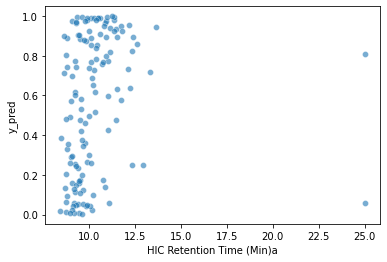

In [18]:
sns.scatterplot(
        x="HIC Retention Time (Min)a", y="y_pred",
        #hue="label",
        data=tap_X,
        #legend="full",
        alpha=0.6
    )

<AxesSubplot:xlabel='SMAC Retention Time (Min)a', ylabel='y_pred'>

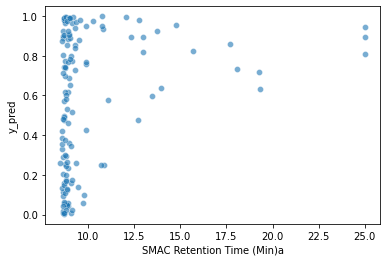

In [19]:
sns.scatterplot(
        x="SMAC Retention Time (Min)a", y="y_pred",
        data=tap_X,
        alpha=0.6
    )

<AxesSubplot:xlabel='Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average', ylabel='y_pred'>

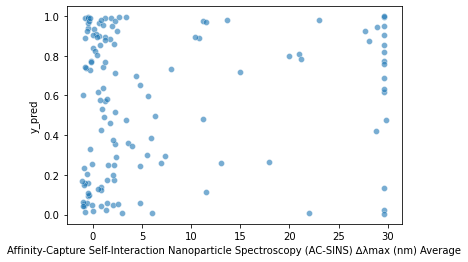

In [20]:
sns.scatterplot(
        x="Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average", y="y_pred",
        data=tap_X,
        alpha=0.6
    )

<AxesSubplot:xlabel='CIC Retention Time (Min)', ylabel='y_pred'>

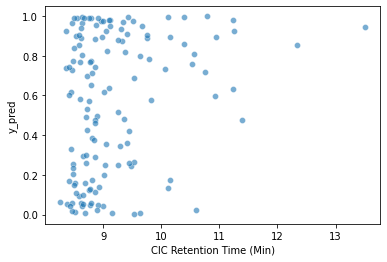

In [21]:
sns.scatterplot(
        x="CIC Retention Time (Min)", y="y_pred",
        data=tap_X,
        alpha=0.6
    )

## BERT embeddings

In [26]:
tap_X = pd.read_feather(path.join(DATA_DIR, "tap/embeddings/bert/bert_tap_embeddings.ftr"))
tap_X["Ab_ID"] = tap_X["Ab_ID"].str.lower()
tap_X.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,abagovomab,-0.004248,-0.024501,-0.011330,-0.027170,0.062747,-0.024793,0.009313,-0.083316,-0.005339,...,-0.008674,-0.002387,-0.021563,0.001087,-0.020986,0.047104,-0.038736,-0.021780,-0.022153,-0.024539
1,abituzumab,0.006593,-0.013591,-0.008454,-0.043601,0.065095,-0.016896,-0.001596,-0.090935,-0.002940,...,0.000486,-0.013063,-0.021852,-0.003531,-0.024620,0.027387,-0.041001,-0.025708,-0.016437,-0.034342
2,abrilumab,0.019445,-0.002642,-0.011395,-0.058757,0.060623,-0.015046,0.006317,-0.083772,-0.006775,...,0.005834,-0.017189,-0.014557,0.003359,-0.035368,0.020287,-0.033941,-0.023549,-0.008720,-0.044038
3,actoxumab,-0.006365,-0.043729,0.005978,-0.025613,0.067748,-0.009542,0.017723,-0.096801,-0.007752,...,-0.000024,-0.012986,-0.019753,-0.004326,-0.044124,0.019544,-0.039559,-0.015679,-0.008837,-0.043877
4,adalimumab,-0.012995,-0.035269,0.014127,-0.042136,0.080592,-0.012831,0.031889,-0.091308,-0.018166,...,-0.002067,-0.022957,-0.021145,-0.002762,-0.058199,0.026781,-0.046815,-0.010110,-0.008785,-0.041761


In [27]:
tap_X = tap_X.merge(
    jain_results[["Name", "HIC Retention Time (Min)a", "SMAC Retention Time (Min)a", "Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average", "CIC Retention Time (Min)"]], 
    left_on="Ab_ID", right_on="Name"
)

tap_X.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2043,2044,2045,2046,2047,Name,HIC Retention Time (Min)a,SMAC Retention Time (Min)a,Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average,CIC Retention Time (Min)
0,abituzumab,0.006593,-0.013591,-0.008454,-0.043601,0.065095,-0.016896,-0.001596,-0.090935,-0.002940,...,0.027387,-0.041001,-0.025708,-0.016437,-0.034342,abituzumab,9.227,8.725,1.458861,8.621
1,abrilumab,0.019445,-0.002642,-0.011395,-0.058757,0.060623,-0.015046,0.006317,-0.083772,-0.006775,...,0.020287,-0.033941,-0.023549,-0.008720,-0.044038,abrilumab,9.413,8.699,-0.928526,8.384
2,adalimumab,-0.012995,-0.035269,0.014127,-0.042136,0.080592,-0.012831,0.031889,-0.091308,-0.018166,...,0.026781,-0.046815,-0.010110,-0.008785,-0.041761,adalimumab,8.816,8.672,1.062328,8.865
3,alemtuzumab,0.008921,-0.015691,0.000028,-0.036383,0.073180,-0.004192,0.010146,-0.077392,0.001329,...,0.034217,-0.043211,-0.023943,-0.005261,-0.023860,alemtuzumab,8.769,8.672,-0.789199,8.514
4,alirocumab,-0.012634,-0.043914,0.010695,-0.025280,0.082735,-0.007233,0.021435,-0.094274,-0.009678,...,0.019747,-0.038604,-0.015006,0.001132,-0.040098,alirocumab,9.036,8.681,1.230511,8.757


### Load model

In [28]:
with open(path.join(DATA_DIR, 'evaluations/10-fold-cross-val/training_split_42/models/multilayer_perceptron_bert_oversampling.pkl'), 'rb') as f:
    model = pickle.load(f)

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [31]:
y_pred = model.predict_proba(tap_X.drop(
    ["Ab_ID", "Name", "HIC Retention Time (Min)a", "SMAC Retention Time (Min)a", "Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average", "CIC Retention Time (Min)"], axis=1
))

In [32]:
preds = y_pred[:,0]

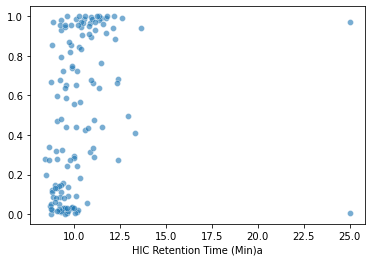

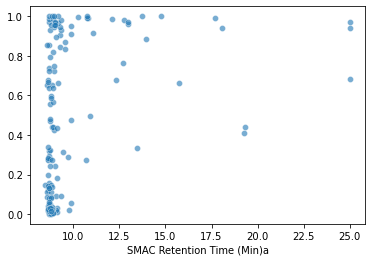

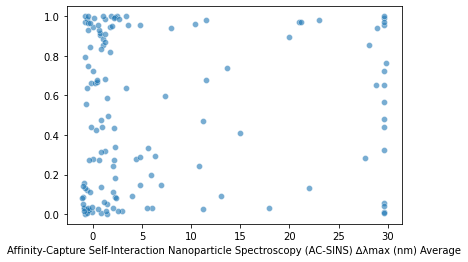

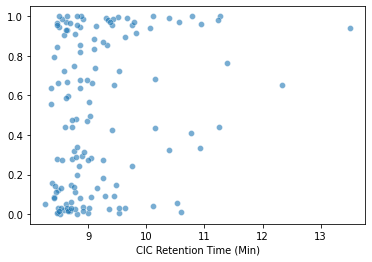

In [34]:
for variable in ["HIC Retention Time (Min)a", "SMAC Retention Time (Min)a", "Affinity-Capture Self-Interaction Nanoparticle Spectroscopy (AC-SINS) ∆λmax (nm) Average", "CIC Retention Time (Min)"]:

    sns.scatterplot(
            x=variable, y=preds,
            data=tap_X,
            alpha=0.6
        )
    plt.show()